### Analise de votos da Região Metropolitana do Rio de Janerio - 2022 - Primeiro Turno

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Carregando Bases

In [81]:
candidatos = pd.read_csv('consulta_cand_2022_RJ.csv', sep = ';', encoding='latin1')

In [82]:
# Verificando candidatos
candidatos

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6027233720226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
1,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6013800620226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6026982420226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
3,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6018478220226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
4,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6014571520226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6006855220226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2781,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6012311020226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2782,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6014797320226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2783,06/10/2022,13:10:14,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6017862720226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


In [83]:
votos = pd.read_csv('votacao_secao_2022_RJ.csv', sep = ';', encoding='latin1')

In [87]:
votos['CD_MUNICIPIO'].unique()

array([60011, 58777, 58335, 58696, 58394, 58637, 58971, 58378, 58467,
       58653, 58491, 58530, 59013, 58122, 58106, 58424, 58041, 58157,
       58149, 58718, 58858, 58360], dtype=int64)

##### Filtrando e Juntando as bases

In [88]:
votos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO'],
      dtype='object')

In [89]:
votos = votos[['SQ_CANDIDATO','NM_VOTAVEL',
       'NM_TIPO_ELEICAO',
       'TP_ABRANGENCIA','CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO',
       'NM_VOTAVEL', 'QT_VOTOS']]
votos.columns

Index(['SQ_CANDIDATO', 'NM_VOTAVEL', 'NM_TIPO_ELEICAO', 'TP_ABRANGENCIA',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO',
       'NM_VOTAVEL', 'QT_VOTOS'],
      dtype='object')

In [90]:
# Olhando para a coluna novamente
votos.head(
)

,SQ_CANDIDATO,NM_VOTAVEL,NM_TIPO_ELEICAO,TP_ABRANGENCIA,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NM_VOTAVEL,QT_VOTOS
0,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,234,62,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,11
1,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,58777,PETRÓPOLIS,65,407,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,1
2,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,58335,DUQUE DE CAXIAS,78,239,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,7
3,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,58696,NOVA IGUAÇU,156,104,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,9
5,190001600399,PAULO GUSTAVO GANIME ALVES TEIXEIRA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,182,40,GOVERNADOR,PAULO GUSTAVO GANIME ALVES TEIXEIRA,11


In [91]:
# olhando para informações dos candidatos
candidatos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTAD

In [92]:
candidatos = candidatos[[ 'DS_CARGO',
       'SQ_CANDIDATO', 'NM_CANDIDATO', 'DS_SITUACAO_CANDIDATURA',
       'SG_PARTIDO',
       'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA',
       'ST_REELEICAO']]

candidatos.head()

,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
0,DEPUTADO FEDERAL,190001645398,RAMON DE PAULA NEVES,APTO,PSB,36,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,SERVIDOR PÚBLICO FEDERAL,3176572.53,N
1,DEPUTADO FEDERAL,190001609674,CLEBER RIBEIRO AFONSO,APTO,PODE,66,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,MILITAR REFORMADO,3176572.53,N
2,DEPUTADO FEDERAL,190001645405,ANDERSON DE SOUSA BESERRA LOPES,APTO,PSB,45,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,3176572.53,N
3,DEPUTADO ESTADUAL,190001615299,EDUARDO FORONI RIBEIRO,APTO,PSDB,58,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO FUNDAMENTAL,1270629.01,N
4,DEPUTADO ESTADUAL,190001609764,CHANTAL CAMPELLO FERRAZ,APTO,UP,24,FEMININO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",1270629.01,N


In [93]:
# Criando a coluna de ligação
candidatos['NM_VOTAVEL'] == candidatos['NM_CANDIDATO']
candidatos.head()

KeyError: 'NM_VOTAVEL'

In [94]:
# Juntando as bases de dados com o merge
base = pd.merge(votos, candidatos, on = 'SQ_CANDIDATO')

In [95]:
# Verificando as colunas da base
base.columns

Index(['SQ_CANDIDATO', 'NM_VOTAVEL', 'NM_TIPO_ELEICAO', 'TP_ABRANGENCIA',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO_x',
       'NM_VOTAVEL', 'QT_VOTOS', 'DS_CARGO_y', 'NM_CANDIDATO',
       'DS_SITUACAO_CANDIDATURA', 'SG_PARTIDO', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO'],
      dtype='object')

##### Filtrar dados para os municipios da região metropolitana

In [96]:
base['NM_MUNICIPIO'].unique()

array(['RIO DE JANEIRO', 'PETRÓPOLIS', 'DUQUE DE CAXIAS', 'NOVA IGUAÇU',
       'ITAGUAÍ', 'NILÓPOLIS', 'SÃO GONÇALO', 'ITABORAÍ', 'MESQUITA',
       'NITERÓI', 'MAGÉ', 'MARICÁ', 'SÃO JOÃO DE MERITI', 'QUEIMADOS',
       'GUAPIMIRIM', 'SEROPÉDICA', 'BELFORD ROXO', 'CACHOEIRAS DE MACACU',
       'JAPERI', 'PARACAMBI', 'RIO BONITO', 'TANGUÁ'], dtype=object)

In [97]:
base.shape


(4786975, 23)

In [98]:
rm = base.query("NM_MUNICIPIO == ('RIO DE JANEIRO', 'PETRÓPOLIS', 'DUQUE DE CAXIAS', 'NOVA IGUAÇU', 'ITAGUAÍ','NILÓPOLIS','SÃO GONÇALO', 'ITABORAÍ', 'MESQUITA','NITERÓI', 'MAGÉ','MARICÁ', 'SÃO JOÃO DE MERITI', 'QUEIMADOS','GUAPIMIRIM','SEROPÉDICA', 'BELFORD ROXO', 'CACHOEIRAS DE MACACU','JAPERI', 'PARACAMBI','RIO BONITO', 'TANGUÁ')")

In [99]:
rm.shape

(4786975, 23)

##### Votos por cor

In [101]:
# contando primeiro os votos
cor_geral = rm['DS_COR_RACA'].value_counts().reset_index()
cor_geral.rename(columns={'index': 'cor'}, inplace = True) # renomeando a coluna
cor_geral['porcent'] = round(cor_geral['DS_COR_RACA'] / cor_geral['DS_COR_RACA'].sum()*100,2)


Porcentagem de votos no Geral contado governador

In [102]:
cor_geral 

,cor,DS_COR_RACA,porcent
0,BRANCA,3022102,63.13
1,PARDA,877153,18.32
2,PRETA,736958,15.40
3,NÃO INFORMADO,98619,2.06
4,INDÍGENA,30728,0.64
5,AMARELA,21415,0.45


### Filtrando dados, sem governador e Senador, apenas Proporcionais ---> DEp FED e DEP EST

In [106]:
# Observando valores unicos para cargo
rm['DS_CARGO_x'].unique()

array(['GOVERNADOR', 'SENADOR', 'DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL'],
      dtype=object)

In [108]:
# Filtrando
votos_proporcionais = rm.query("DS_CARGO_x == ('DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL')")
votos_proporcionais.head()

,SQ_CANDIDATO,NM_VOTAVEL,NM_TIPO_ELEICAO,TP_ABRANGENCIA,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO_x,NM_VOTAVEL,...,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
319694,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,7,479,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
319695,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,245,277,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
319696,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,169,171,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
319697,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,242,24,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
319698,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,246,31,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N


In [110]:
# Verificando se estão corretos
votos_proporcionais['DS_CARGO_x'].unique()
# Correto

array(['DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL'], dtype=object)

### Analisando dados de votos proporcionais

#### Deputados Federais

* Quantos votos foram para Pretos e Pardos entre os deputados Federal?


In [113]:
# Quantos votos foram para Pretos e Pardos entre os deputados Federal
votos_proporcionais_fed = votos_proporcionais.query("DS_CARGO_x == 'DEPUTADO FEDERAL'")
votos_proporcionais_fed.head()

,SQ_CANDIDATO,NM_VOTAVEL,NM_TIPO_ELEICAO,TP_ABRANGENCIA,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO_x,NM_VOTAVEL,...,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
319694,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,7,479,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
319695,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,245,277,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
319696,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,169,171,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
319697,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,242,24,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N
319698,190001609741,VERA RAMOS DA SILVA,ELEIÇÃO ORDINÁRIA,E,60011,RIO DE JANEIRO,246,31,DEPUTADO FEDERAL,VERA RAMOS DA SILVA,...,APTO,AVANTE,61,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,3176572.53,N


In [122]:
votos_proporcionais_fed['QT_VOTOS'].sum()

6184190

In [123]:
# FIltrando para agrupar
cor_dep_fed_raca_genero = votos_proporcionais_fed[["DS_COR_RACA", "DS_GENERO","QT_VOTOS"]]
cor_dep_fed_raca_genero

,DS_COR_RACA,DS_GENERO,QT_VOTOS
319694,BRANCA,FEMININO,1
319695,BRANCA,FEMININO,1
319696,BRANCA,FEMININO,1
319697,BRANCA,FEMININO,1
319698,BRANCA,FEMININO,1
...,...,...,...
2524505,BRANCA,MASCULINO,2
2524506,BRANCA,MASCULINO,1
2524507,BRANCA,MASCULINO,1
2524508,BRANCA,MASCULINO,1


In [133]:
# Calculando as porcentagens
cor_genero_dep_fed = cor_dep_fed_raca_genero.groupby(["DS_COR_RACA", "DS_GENERO"]).sum().reset_index()
cor_genero_dep_fed['porcentagem'] = round(cor_genero_dep_fed['QT_VOTOS'] / cor_genero_dep_fed['QT_VOTOS'].sum()*100,2)
# Demonstrando os dados
cor_genero_dep_fed.sort_values(by = 'porcentagem', ascending=False)

,DS_COR_RACA,DS_GENERO,QT_VOTOS,porcentagem
1,BRANCA,MASCULINO,3408343,55.11
7,PARDA,MASCULINO,802668,12.98
0,BRANCA,FEMININO,786942,12.73
8,PRETA,FEMININO,449371,7.27
9,PRETA,MASCULINO,409307,6.62
6,PARDA,FEMININO,191686,3.10
5,NÃO INFORMADO,MASCULINO,104350,1.69
4,NÃO INFORMADO,FEMININO,26735,0.43
2,INDÍGENA,FEMININO,4563,0.07
3,INDÍGENA,MASCULINO,225,0.00


* 55,11% dos votos para deputado Federal nas Região Metropolitana Foram para Homens Brancos
* Votos totais de DEputados Federais para brancos na Região Metropolitana foi de 67,84%
* Votos para Candidatas Mulheres Pretas é de 7,27%
* Votos em Deputados Federais Negros (Pretos e Pardos) somaram 29,97%
* Votos em Indígenas para Deputado Federal somou apenas 0,07%, com 4788 votos, sendo mais de 90 % votos em Mulheres

Analisando por profissão dos Deputados Federais

In [143]:
profi_deputados_federais = votos_proporcionais_fed[['DS_OCUPACAO','QT_VOTOS']]
profi_deputados_federais
# Agrupando e passando para mesma variável
profi_deputados_federais = profi_deputados_federais.groupby(['DS_OCUPACAO']).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)
profi_deputados_federais.head()

,DS_OCUPACAO,QT_VOTOS
31,DEPUTADO,2162145
101,VEREADOR,765705
38,EMPRESÁRIO,537704
1,ADVOGADO,458850
63,OUTROS,241817


In [144]:
# Criando porcentagem dos votos para cada ocupação
profi_deputados_federais['porcentagem'] = round(profi_deputados_federais['QT_VOTOS'] / profi_deputados_federais['QT_VOTOS'].sum()*100,2)

In [148]:
#filtrando para os 10 primeiros
profi_deputados_federais = profi_deputados_federais.head(10)
profi_deputados_federais

,DS_OCUPACAO,QT_VOTOS,porcentagem
31,DEPUTADO,2162145,34.96
101,VEREADOR,765705,12.38
38,EMPRESÁRIO,537704,8.69
1,ADVOGADO,458850,7.42
63,OUTROS,241817,3.91
59,MÉDICO,233947,3.78
56,MILITAR REFORMADO,219333,3.55
80,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,187472,3.03
24,COMERCIANTE,122835,1.99
41,ENGENHEIRO,113557,1.84


* 34,96% São votos para já deputados
* 12,38% são Vereadores
* 8.69 são empresários

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'DEPUTADO'),
  Text(1, 0, 'VEREADOR'),
  Text(2, 0, 'EMPRESÁRIO'),
  Text(3, 0, 'ADVOGADO'),
  Text(4, 0, 'OUTROS'),
  Text(5, 0, 'MÉDICO'),
  Text(6, 0, 'MILITAR REFORMADO'),
  Text(7, 0, 'SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA'),
  Text(8, 0, 'COMERCIANTE'),
  Text(9, 0, 'ENGENHEIRO')])

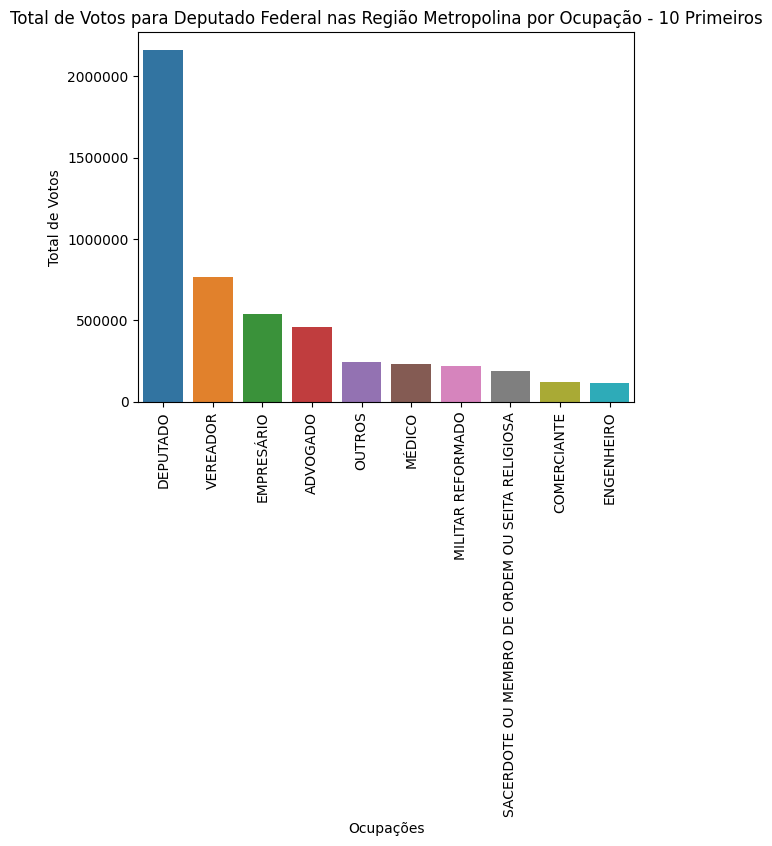

In [165]:
# Elaborando um gráfico para as profissões
sns.barplot(data = profi_deputados_federais, x = 'DS_OCUPACAO', y = 'QT_VOTOS')
plt.ticklabel_format(style='plain', axis='y') # Tirando notação cientifica do eixo y
plt.xlabel('Ocupações')
plt.ylabel('Total de Votos')
plt.title('Total de Votos para Deputado Federal nas Região Metropolina por Ocupação - 10 Primeiros')
plt.xticks(rotation = 90)


In [180]:
# Deputados Federais Mais Votados na baixada
votos_proporcionais_fed_top = votos_proporcionais_fed[['NM_CANDIDATO', 'QT_VOTOS']] # Separando as informações
votos_proporcionais_fed_top = votos_proporcionais_fed_top.groupby(['NM_CANDIDATO']).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending=False)
votos_proporcionais_fed_top=votos_proporcionais_fed_top.head(10)
votos_proporcionais_fed_top

,NM_CANDIDATO,QT_VOTOS
237,DANIELA MOTÉ DE SOUZA CARNEIRO,172962
976,TALÍRIA PETRONE SOARES,170688
279,EDUARDO PAZUELLO,165518
617,LUIZ ANTONIO DE SOUZA TEIXEIRA JUNIOR,160820
980,TARCÍSIO MOTTA DE CARVALHO,147693
52,ALTINEU CORTES FREITAS COUTINHO,127529
791,OTONI MOURA DE PAULO JUNIOR,118875
629,LUIZ LINDBERGH FARIAS FILHO,118793
418,GUTEMBERG REIS DE OLIVEIRA,111443
361,FRANCISCO RODRIGUES DE ALENCAR FILHO,104101


Text(0.5, 1.0, 'Os 10 candidatos mais votados para Deputado Federal na Região Metropolitana nas Eleições de 2022')

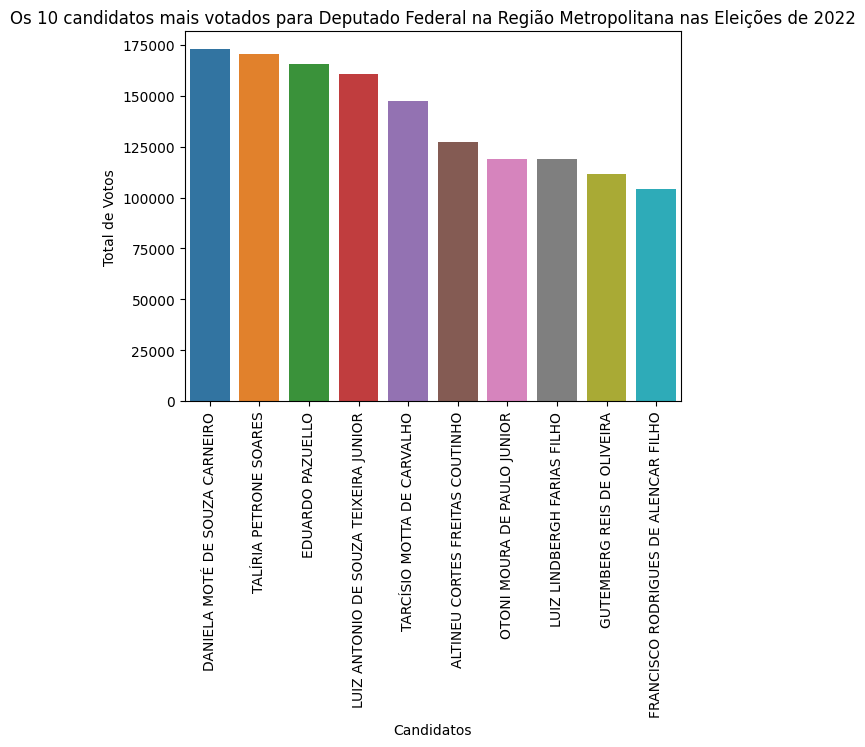

In [187]:
sns.barplot(data = votos_proporcionais_fed_top, x = 'NM_CANDIDATO', y = 'QT_VOTOS')
plt.xticks(rotation = 90)
plt.xlabel('Candidatos')
plt.ylabel('Total de Votos')
plt.title('Os 10 candidatos mais votados para Deputado Federal na Região Metropolitana nas Eleições de 2022')


In [199]:
# Votos por Partido para deputados federais
votos_proporcionais_fed_partido = votos_proporcionais_fed[['SG_PARTIDO', 'QT_VOTOS']]
votos_proporcionais_fed_partido = votos_proporcionais_fed_partido.groupby(['SG_PARTIDO']).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending=False) # Agrupando os dados
# Criando a porcentagem
votos_proporcionais_fed_partido['porcentagem'] = round(votos_proporcionais_fed_partido['QT_VOTOS'] / votos_proporcionais_fed_partido['QT_VOTOS'].sum()*100,2)

In [200]:
# Olhando so dados
# Filtrando para os 10 mais
votos_proporcionais_fed_partido = votos_proporcionais_fed_partido.head(10)
votos_proporcionais_fed_partido

,SG_PARTIDO,QT_VOTOS,porcentagem
11,PL,1245116,20.13
30,UNIÃO,615970,9.96
22,PSOL,580606,9.39
24,PT,519991,8.41
20,PSD,517366,8.37
28,REPUBLICANOS,392167,6.34
15,PP,366267,5.92
4,MDB,314733,5.09
10,PDT,166738,2.70
18,PSB,164795,2.66


Text(0.5, 1.0, 'Porcentagem de Votos para Deputados Federais na Região Metropolitana do Rio de Janeiro por Partido em 2022')

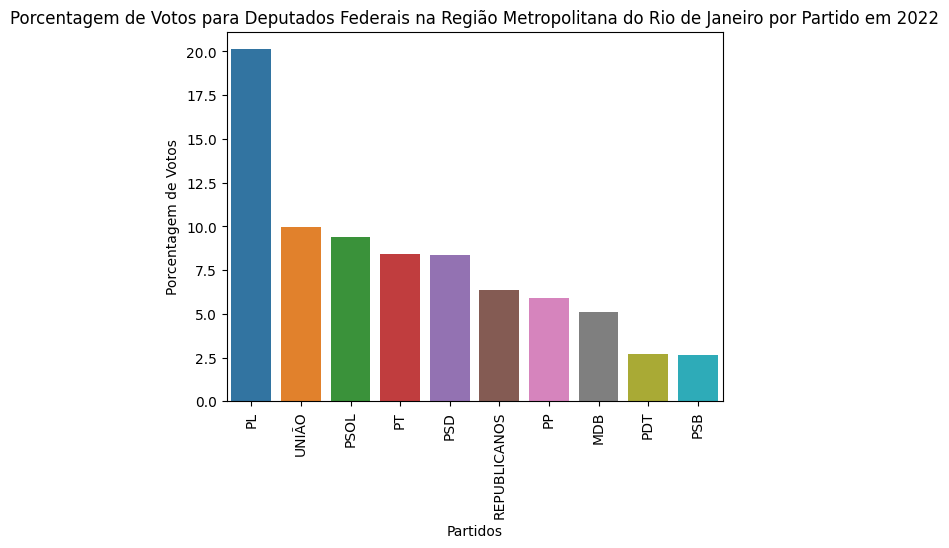

In [201]:
# Produzindo grafico de partidos
sns.barplot(data = votos_proporcionais_fed_partido, x = "SG_PARTIDO", y = 'porcentagem')
plt.xticks(rotation = 90)
plt.xlabel('Partidos')
plt.ylabel('Porcentagem de Votos')
plt.title('Porcentagem de Votos para Deputados Federais na Região Metropolitana do Rio de Janeiro por Partido em 2022')


In [197]:
votos_proporcionais.columns

Index(['SQ_CANDIDATO', 'NM_VOTAVEL', 'NM_TIPO_ELEICAO', 'TP_ABRANGENCIA',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO_x',
       'NM_VOTAVEL', 'QT_VOTOS', 'DS_CARGO_y', 'NM_CANDIDATO',
       'DS_SITUACAO_CANDIDATURA', 'SG_PARTIDO', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO'],
      dtype='object')

* Candidatos que tentam a reeleição são os mais votados?

In [203]:
# Reeleição
# Agrupando
votos_proporcionais_fed_reeleicao = votos_proporcionais_fed[['ST_REELEICAO', 'QT_VOTOS']]
votos_proporcionais_fed_reeleicao = votos_proporcionais_fed_reeleicao.groupby(['ST_REELEICAO']).sum().reset_index().sort_values(by = 'QT_VOTOS', ascending = False)

In [204]:
votos_proporcionais_fed_reeleicao

,ST_REELEICAO,QT_VOTOS
0,N,4357934
1,S,1826256


In [205]:
# Criando porcentagem para informações de Reeleição 
votos_proporcionais_fed_reeleicao['porcentagem'] = round(votos_proporcionais_fed_reeleicao['QT_VOTOS'] / votos_proporcionais_fed_reeleicao['QT_VOTOS'].sum()*100,2)

In [206]:
# Olhando os dados de Reeleição novamente
votos_proporcionais_fed_reeleicao

,ST_REELEICAO,QT_VOTOS,porcentagem
0,N,4357934,70.47
1,S,1826256,29.53


* 70,47 % dos votos foram para candidatos que não tentam reeleição na Região Metropolitana do Rio de Janeiro